<p style="color:#FFF; background-color:#00C; padding:12px; font-size:20px; text-align:center">
<span style="font-size:48px"><b>PACKAGE : MATPLOTLIB</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right"><i>schlick@u-bordeaux.fr</i></span></p>

Le package [**matplotlib**](https://matplotlib.org) fournit à Python un ensemble d'outils très complets pour créer des visualisations scientifiques, qu'elles soient statiques, animées ou interactives

La documentation complète du package se trouve sur le site [**matplotlib.org**](https://matplotlib.org/stable/users) mais elle est également directement disponible dans le menu `Help` de l'interface Jupyter. Ce notebook a pour objet de faire un tour d'horizon rapide et de montrer les fonctionnalités les plus utiles de **matplotlib** dans le cadre d'une utilisation au sein de l'environnement Jupyter
    
---
On importe habituellement le package **matplotlib** par le biais d'un alias, avec l'une des deux commandes suivantes :
> `import matplotlib.pyplot as mp` &emsp;ou&emsp; `import matplotlib.pyplot as plt`
    
afin de racourcir le préfixe qu'il faudra utiliser pour accéder aux fonctions qu'il contient :

In [1]:
import numpy as np # import du package 'numpy' avec alias 'np'
import matplotlib.pyplot as mp # import du package 'matplotlib' avec alias 'mp'
from SRC.show import show # import de la fonction 'show' permettant de simplifier certaines explications

Le package propose de choisir parmi une liste de **styles prédéfinis** pour contrôler l'aspect esthétique des visualisations

In [2]:
mp.style.use('default') # styles possibles : default  classic  grayscale  bmh  ggplot  seaborn

<h2 style="padding:16px; color:#FFF; background-color:#00C">A - Visualisation de données 1D</h2>

La visualisation de données à une dimension s'effectue à l'aide des fonctions `plot` et `hist`

### 1 - Visualisation de données discrètes : $\{z_k \;,\; \forall k = 0..n\}$

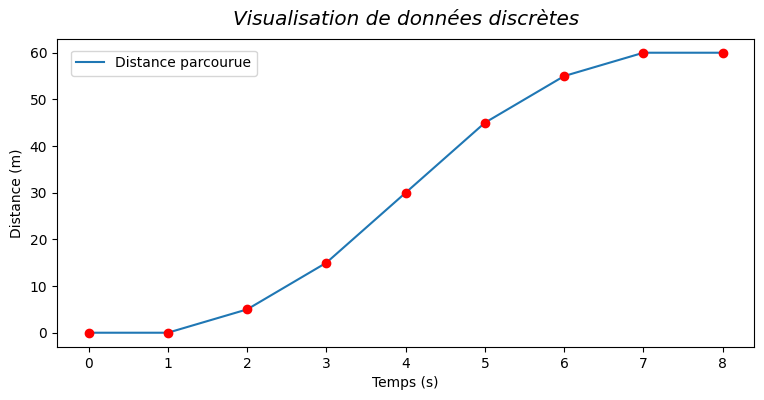

In [3]:
time = [0, 1, 2, 3, 4, 5, 6, 7, 8]
dist = [0, 0, 5, 15, 30, 45, 55, 60, 60]

mp.figure(figsize=(9,4), dpi=100) # choix de la taille (en pouces) et de la précision (en points par pouce)
mp.plot(time, dist) # affichage sous forme de segments bleus (par défaut)
mp.plot(time, dist, 'or') # affichage sous forme de disques (= 'o') rouges (= 'r')
mp.xlabel('Temps (s)') # ajout d'un label pour l'axe des 'x'
mp.ylabel('Distance (m)') # ajout d'un label pour l'axe des 'y'
mp.legend(['Distance parcourue'], loc=(0.02, 0.88)) # ajout et positionnement d'une légende
mp.title('Visualisation de données discrètes', pad=10, fontsize='x-large', style='italic'); # ajout d'un titre
mp.savefig('IMG/plot.png') # conversion en image matricielle au format PNG (résolution = figsize * dpi)
mp.savefig('IMG/plot.svg') # conversion en image vectorielle au formmt SVG (toute résolution)

---
### 2 - Visualisation d'histogrammes

[[4 1 5 3 3 5 6 5 4 5 2 1 5 4 3 6 6 6 5 4]]


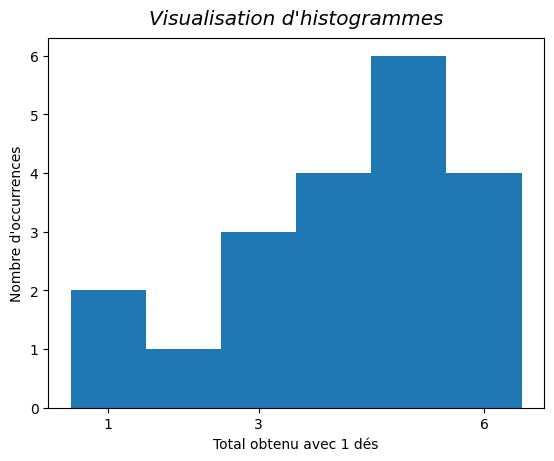

In [17]:
nd, nf, nr = 1, 6, 20 # nombre de dés, nombre de faces par dé et nombre de lancers simulés
rolls = np.random.randint(1, nf+1, (nd, nr)) # génération des lancers aléatoires de dés
print(rolls)

mp.hist(rolls.sum(axis=0), bins=range(nd, nd*nf+2), align='left') # affichage de l'histogramme
mp.xticks([nd, nd*(nf+1)//2, nd*nf]) # graduation horizontale (uniquement min, médiane et max)
mp.xlabel(f"Total obtenu avec {nd} dés"); mp.ylabel("Nombre d'occurrences") # ajout des labels
mp.title("Visualisation d'histogrammes", pad=10, fontsize='x-large', style='italic'); # et du titre

**Note** : des affichages alternatifs (plus complets) sont disponibles avec les fonctions `bar` et `boxplot`

---
### 3 - Visualisation de fonctions cartésiennes : $y = f(x)$

In [18]:
def f(x):
  """Hermite step function"""
  return x*x*(3-2*x)

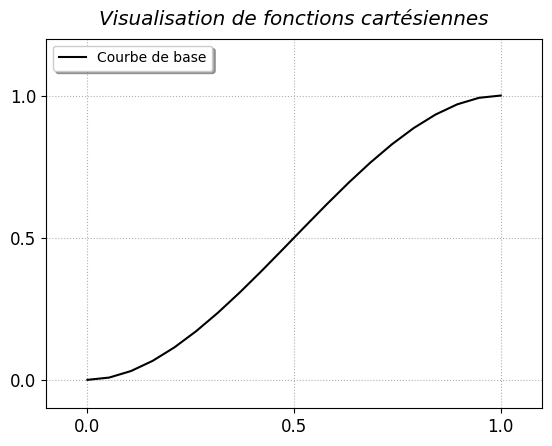

In [19]:
n = 20 # nombre d'échantillons
x = np.linspace(0, 1, n) # échantillonnage de l'intervalle [0,1] en 'n' valeurs uniformes
y1 = f(x) # fonction sans bruit
y2 = f(x) * (1.0 + 0.05*np.random.uniform(-3, 3, n)) # ajout d'un bruit multiplicatif uniforme
y3 = f(x) * (1.0 + 0.05*np.random.normal(0, 1, n)) # ajout d'un bruit multiplicatif gaussien

mp.plot(x, y1, 'k-', label='Courbe de base') # tracé sous forme de segments ('-') noirs ('k')
#mp.plot(x, y2, 'bo', label='Bruit uniforme') # tracé sous forme de disques ('o') bleus ('b')
#mp.plot(x, y3, 'r*', label='Bruit gaussien') # tracé sous forme d'étoiles ('*') rouges ('r')
mp.legend(loc='upper left', shadow=True) # ajout de la légende avec les labels des courbes
mp.axis([-0.1, 1.1, -0.1, 1.2]) # amplitude des axes [xmin, xmax, ymin, ymax]
mp.xticks([0,0.5,1], size='large'); mp.yticks([0,0.5,1], size='large') # graduation des axes
mp.grid(linestyle=':') # style de grille ('-' = trait continu, ':' = trait pointillé)
mp.title('Visualisation de fonctions cartésiennes', pad=10, fontsize='x-large', style='italic');

---
### 4 - Visualisation de fonctions polaires : $r = f(\theta)$

In [20]:
def fr(theta):
  """quadrifolium spiral (polar definition)"""
  return theta/50 - np.cos(4*theta) + 1*np.sin(4*theta)**2

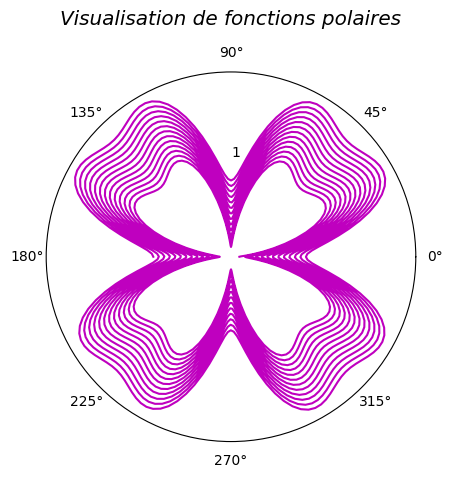

In [21]:
n = 2000 # nombre d'échantillons
theta = np.linspace(0, 25*np.pi, n) # échantillonnage de l'intervalle [0,25*pi] en 'n' valeurs
r = fr(theta) # calcul des rayons associés aux différents angles polaires

axes = mp.subplot(111, projection='polar') # création d'un tracé avec projection polaire
mp.plot(theta, r, 'm-') # tracé sous forme de segments ('-') de couleur magenta ('m')
axes.set_rticks([1]); axes.set_rlabel_position(90); mp.grid(linestyle='-') # paramétrage de la grille
mp.title('Visualisation de fonctions polaires', pad=15, fontsize='x-large', style='italic');

<h2 style="padding:16px; color:#FFF; background-color:#00C">B - Visualisation de données 2D</h2>

La visualisation de données à deux dimensions s'effectue à l'aide des fonctions `plot_surface` et `scatter`

### 1 - Visualisation de données éparses : $\{(x_k,y_k), \;\; \forall k = 0..n\}$

(500, 2) (100, 2)


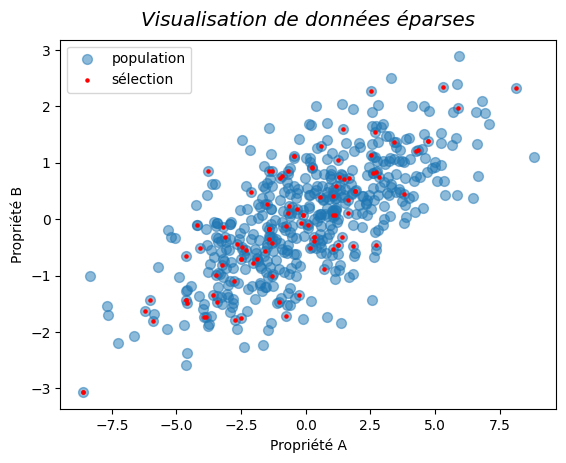

In [23]:
n, mean, covar = 500, [0,0], [[9,2], [2,1]] # nombre d'échantillons, moyenne et matrive de covariance
samples = np.random.multivariate_normal(mean, covar, n) # échantillonnage multivarié selon loi normale
choices = samples[np.random.choice(range(n), n//5)] # sélection aléatoire d'un échantillon sur 5
print(samples.shape, choices.shape)

mp.scatter(*samples.T, s=50, alpha=0.5); mp.scatter(*choices.T, s=5, c='r') # affichage des données éparses
mp.xlabel('Propriété A'); mp.ylabel('Propriété B'); mp.legend(['population','sélection'], loc='upper left')
mp.title('Visualisation de données éparses', pad=10, fontsize='x-large', style='italic');

---
### 2 - Visualisation de fonctions paramétriques : $x=f(t) \;,\; y=g(t)$

In [24]:
def fxy(t):
  """lissajous curve (parametric definition)"""
  return np.sin(5*t), np.sin(6*t)

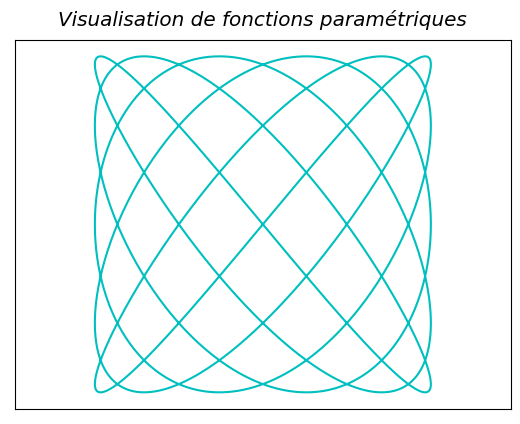

In [25]:
n = 2000 # nombre d'échantillons
t = np.linspace(0, 2*np.pi, n) # échantillonnage de l'intervalle [0,2*pi] en 'n' valeurs
x, y = fxy(t) # échantillonnage des coordonnées 'x' et 'y' de la fonction

mp.plot(x, y, 'c-') # tracé sous forme de segments ('-') cyan ('c')
mp.axis('equal') # on force la même échelle sur les deux axes
mp.xticks([]); mp.yticks([]) # suppression des graduations sur les axes
mp.title('Visualisation de fonctions paramétriques', pad=10, fontsize='x-large', style='italic');

---
### 3 - Visualisation de surfaces d'élévation : $z = f(x,y)$

In [4]:
def fz(x, y, args):
  """sum of two-dimensional Gaussian lobes"""
  return sum([c*np.exp(-(a*x-a*u)**2-(b*y-b*v)**2) for u,v,a,b,c in args])
  #return np.exp(-2*x*x-2*y*y)*np.cos(10*(x*x+y*y)) # onde isotrope avec amortissement gaussien 

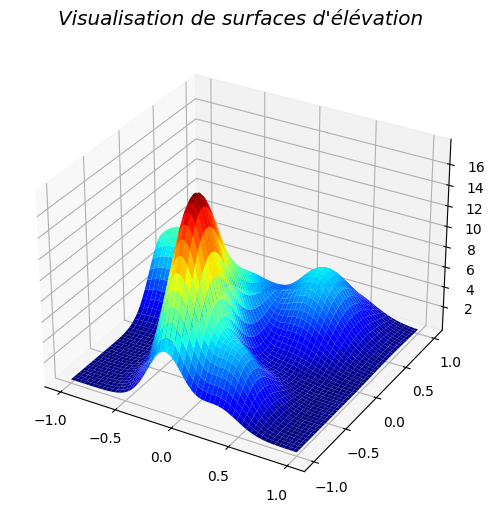

In [5]:
from mpl_toolkits.mplot3d import axes3d # par défaut, les axes 3D ne sont pas importés
m, n = 5, 200 # nombre de lobes, nombre d'échantillons en x et y
x, y = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n)) # échantillonnage de la grille (x,y)
ranges = [(-1,1), (-1,1), (1,5), (1,5), (5,10)] # amplitudes de variation des paramètres des lobes
args = np.array([np.random.uniform(a,b,m) for (a,b) in ranges]).T # choix aléatoire des paramètres
z = fz(x, y, args) # calcul de l'altitude pour chaque couple (x,y) de la grille

mp.figure(figsize=(12,6)) # choix de la taille de la figure
axes = mp.subplot(111, projection='3d') # création d'un tracé avec projection 3D
#axes.plot_wireframe(x, y, z, linewidth=0.5) # affichage du maillage de la surface d'élévation
axes.plot_surface(x, y, z, cmap='jet') # affichage de la surface d'élévation (résolution automatique)
#axes.plot_surface(x, y, z, rstride=1, cstride=1, cmap='jet') # affichage haute résolution
axes.set_xticks([-1, -0.5, 0, 0.5, 1]); axes.set_yticks([-1, -0.5, 0, 0.5, 1]) # graduation des axes
mp.title("Visualisation de surfaces d'élévation", pad=10, fontsize='x-large', style='italic');

<h2 style="padding:16px; color:#FFF; background-color:#00C">C - Visualisation de matrices de données</h2>

La visualisation de matrices de données s'effectue à l'aide de la fonction `imshow`

### 1 - Visualisation de matrices scalaires : $\{z_{ij} \;,\; \forall i = 0..m \;,\; \forall j = 0..n\}$

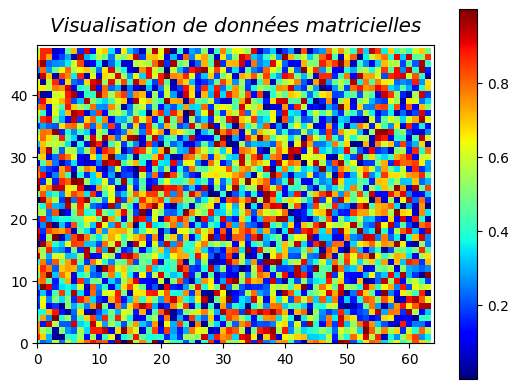

In [30]:
m, n = 48, 64 # taille de la matrice !! ordre matriciel et non cartésien pour les indices !!
data = np.random.rand(m, n) # distribution uniforme sur [0,1]
#data = np.random.normal(0, 1, (m, n)) # distribution normal (moyenne = 0, écart-type = 1)
#data = np.add.outer(range(m),range(n)) # table d'addition [0,m[ x [0,n]
#data = np.multiply.outer(range(m),range(n)) # table de multiplication [0,m[ x [0,n]

#mp.imshow(data) # affichage sans interpolation et avec échelle de couleurs par défaut ('viridis')
mp.imshow(data, cmap='jet') # idem avec échelle de couleurs spécifique ('jet' = couleurs froides --> chaudes)
#mp.imshow(data, cmap='jet', interpolation='sinc') # idem avec interpolation spécifique (sinus cardinal)
mp.colorbar() # affichage de la gradation colorimétrique
mp.axis([0, n, 0, m]) # amplitude des axes [xmin, xmax, ymin, ymax] !! ordre cartésien et non matriciel !!
mp.title('Visualisation de données matricielles', pad=10, fontsize='x-large', style='italic');

# ----------------------------------------------------------------------------------------------------------
# Liste des échelles de couleurs possibles : (le suffixe '_r' permet d'obtenir l'échelle inverse)
# [viridis] / jet / gray / hsv / prism / spring / summer / autumn / winter / Reds / Greens / Blues
# -----------------------------------------------------------------------------------------------------------
# Liste des modes d'interpolation possibles :
# [nearest] / bilinear / bicubic / spline16 / spline36 / hanning / hamming / hermite
# kaiser / quadric / catrom / gaussian / bessel / mitchell / sinc / lanczos
# -----------------------------------------------------------------------------------------------------------

---
### 2 - Visualisation de courbes de niveau : $z = f(x,y)$

In [31]:
def fz(x, y, args):
  """sum of two-dimensional Gaussian lobes"""
  return sum([c*np.exp(-(a*x-a*u)**2-(b*y-b*v)**2) for u,v,a,b,c in args])

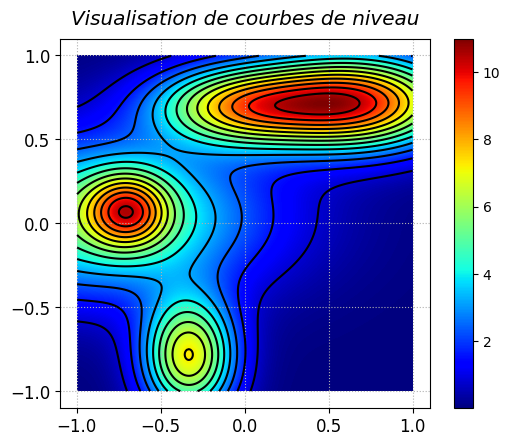

In [32]:
m, n = 5, 500 # nombre de lobes gaussiens, nombre d'échantillons en x et y
x, y = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n)) # échantillonnage de la grille (x,y)
domains = [(-1,1), (-1,1), (1,5), (1,5), (5,10)] # domaines de variation pour les paramètres des lobes
args = np.array([np.random.uniform(a,b,m) for (a,b) in domains]).T # choix aléatoire des paramètres
z = fz(x, y, args) # calcul de l'altitude pour chaque couple (x,y) de la grille

mp.imshow(z, extent=[-1, 1, -1, 1], cmap='jet') # affichage de la fonction d'élévation en fausses couleurs
mp.colorbar() # affichage de la gradation colorimétrique
mp.contour(z, 16, extent=[-1, 1, -1, 1], origin='image', colors='k') # affichage des lignes de niveaux
mp.xticks([-1, -0.5, 0, 0.5, 1], size='large'); mp.yticks([-1, -0.5, 0, 0.5, 1], size='large')
mp.axis([-1.1, 1.1, -1.1, 1.1]); mp.grid(linestyle=':')
mp.title('Visualisation de courbes de niveau', pad=10, fontsize='x-large', style='italic');

---
### 3 - Visualisation d'images RGB

(480, 640, 3) uint8


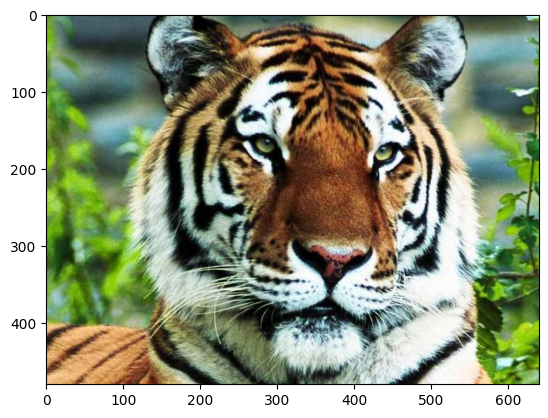

In [33]:
img = mp.imread('IMG/tiger.jpg') # lecture de l'image sur disque
print(img.shape, img.dtype)
mp.imshow(img); # affichage de l'image avec les paramètres par défaut

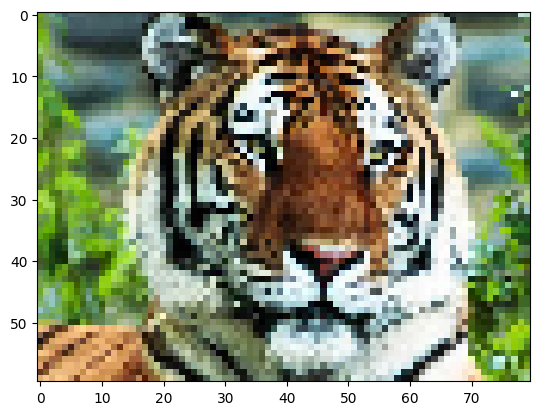

In [34]:
m, n = 8, 8 # taille des blocs pour sous-échantillonnage
img_sub = img[::m, ::n] # sous-échantillonnage de l'image par blocs de taille m x n
mp.imshow(img_sub); # affichage de l'image sous-échantillonnée
#mp.imshow(img_sub, interpolation='bicubic'); # affichage de l'image avec interpolation bicubique

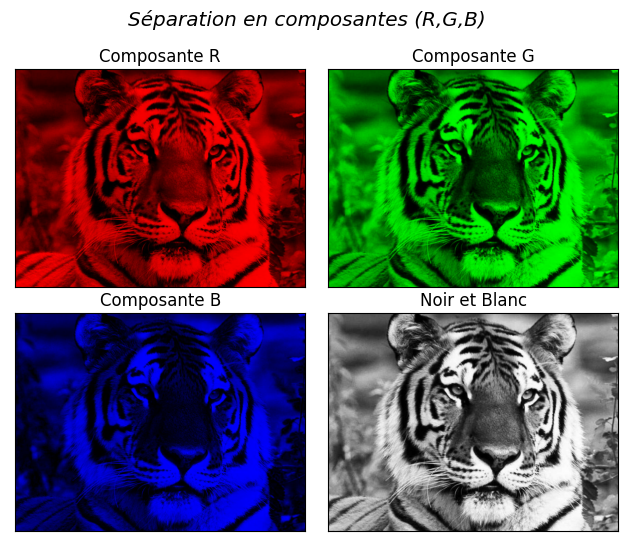

In [35]:
imgR, imgG, imgB = img[:, :, 0], img[:, :, 1], img[:, :, 2] # séparation de l'image en canaux R, G, B
imgL = (0.299*imgR + 0.587*imgG + 0.114*imgB).astype(np.uint8) # conversion de l'image en luminance
imgZ = np.zeros_like(imgL) # création d'une image à valeurs nulles (taille et type identiques à 'imgL')
fig, axes = mp.subplots(2, 2, figsize=(8,6)) # division de la figure en une grille de 2x2 cases
axes[0,0].imshow(np.dstack([imgR, imgZ, imgZ])); axes[0,0].set_title('Composante R')
axes[0,1].imshow(np.dstack([imgZ, imgG, imgZ])); axes[0,1].set_title('Composante G')
axes[1,0].imshow(np.dstack([imgZ, imgZ, imgB])); axes[1,0].set_title('Composante B')
axes[1,1].imshow(np.dstack([imgL, imgL, imgL])); axes[1,1].set_title('Noir et Blanc')
mp.setp(axes, xticks=[], yticks=[]) # suppression des graduations pour toutes les sous-figures
mp.subplots_adjust(wspace=0.02, hspace=0.12) # choix de l'espace entre les cases de la grille
fig.suptitle("Séparation en composantes (R,G,B)", fontsize='x-large', style='italic'); # titre global

<h2 style="padding:16px; color:#FFF; background-color:#00C">D - Divers</h2>

[**gallerie officielle matplotlib**](https://matplotlib.org/gallery/index.html)

[**types de tracés**](https://matplotlib.org/api/axes_api.html#plotting)